# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [99]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

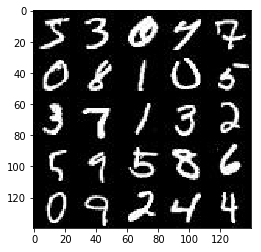

In [100]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

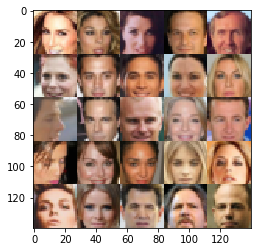

In [101]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [102]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Applications/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [103]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    # return None, None, None
    
    # inputs_real for discriminator
    inputs_real = tf.placeholder(tf.float32,(None,image_width,image_height,image_channels),name="input_real")

    # inputs_z for generator
    inputs_z = tf.placeholder(tf.float32,(None,z_dim),name = "input_z")
    learning_rate = tf.placeholder(tf.float32,(None),name = "learning_rate")
    
    return inputs_real,inputs_z,learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [104]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    #return None, None
    alpha = 0.2
    with tf.variable_scope('discriminator',reuse=reuse):
      
        x1 = tf.layers.conv2d(images,64,4,strides=2,padding='same')
        # x1 = tf.layers.batch_normalization(x1,training=True)
        relu1 = tf.maximum(alpha * x1, x1)
        
        # convolution > batch norm > leaky ReLU       
        x2 = tf.layers.conv2d(relu1,128,4,strides=2,padding='same')
        x2 = tf.layers.batch_normalization(x2,training=True)
        relu2 = tf.maximum(alpha * x2, x2)        
        
        # convolution > batch norm > leaky ReLU
        x3 = tf.layers.conv2d(relu2,256,4,strides=2,padding='same')
        x3 = tf.layers.batch_normalization(x3,training=True)
        relu3 = tf.maximum(alpha * x3, x3) 
        
        flat = tf.reshape(relu3,(-1,4*4*256))
        logits = tf.layers.dense(flat,1)
        out = tf.sigmoid(logits)
        
    return out,logits
        


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [105]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    # return None
    
    reuse = not is_train 
    alpha = 0.2
    
    with tf.variable_scope('generator',reuse= reuse):
        
        # convolution > batch norm > leaky ReLU
        
        # ----About PADDING----
        #######SAME PADDING######
        # output_height = input_height/stride
        # output_width  = input_width/stride
        
        ######VALID PADDING######
        # output_height = (input_height - filter_height + 1)/stride
        # output_width  = (input_width  - filter_width  + 1)/stride
        
        # Now, output_height and output_width is 4
        # And the final input_height and input_width is 28
        # 28 --(trans3)--> 14 --(trans2)--> 7 --(trans1)--> 4
          
        # First fully connected layer
        x = tf.layers.dense(z, 4*4* 512)
        
        # Reshape it to start convolutional stack 
        x = tf.reshape(x,(-1,4,4,512))
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha * x, x)
        #print(x)
   
        # trans1
        x1 = tf.layers.conv2d_transpose(x, 256,4,strides=1,padding='valid')
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #print("trans1:")
        #print(x1)
                
        # trans2
        x2 = tf.layers.conv2d_transpose(x1, 128,4,strides=2,padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #print("trans2:")
        #print(x2)
        
        # Output layer
        # trans3
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim,4,strides=2,padding='same')
        #print("trans3:")
        #print(logits)
        out = tf.tanh(logits)
 
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [106]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function 
    # return None, None
    
    # Build the model
    # def generator(z, out_channel_dim, is_train=True):
    g_model = generator(input_z, out_channel_dim,is_train=True)
    
    # def discriminator(images, reuse=False):
    d_model_real,d_logits_real = discriminator(input_real)
    d_model_fake,d_logits_fake = discriminator(g_model,reuse=True)
    
    # Calculate losses
    d_loss_real = tf.reduce_mean( 
                      tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,
                                                              labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
                      tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                              labels=tf.zeros_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(
                  tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                          labels=tf.ones_like(d_model_fake)))
    
    return d_loss,g_loss
    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [107]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # return None, None
    
    # Get the trainable_variables, split into G and D parts
    t_vars = tf.trainable_variables()
    
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    # Optimize
    # tf.control_dependencies:
    # Use with the with keyword to specify that all operations constructed within the context 
    # should have control dependencies on control_inputs
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(d_loss,var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(g_loss,var_list=g_vars)
    
    return d_train_opt,g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [108]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [109]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model

    input_real,input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss,g_loss = model_loss(input_real,input_z,data_shape[3])
    d_train_opt,g_train_opt = model_opt(d_loss,g_loss,learning_rate,beta1)
    
    losses = []
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                steps += 1

                # TODO: Train Model             
   
                # for D
                batch_images = batch_images * 2.0

                # Sample random nosie for G
                batch_z = np.random.uniform(-1,1,size=(batch_size,z_dim))
                 
                # Run optimizers
                _ = sess.run(d_train_opt,feed_dict={input_real:batch_images, input_z: batch_z, lr: learning_rate })
                _ = sess.run(g_train_opt,feed_dict={input_real:batch_images, input_z: batch_z})
                
                if steps % 100 == 0:  
                    train_loss_d = sess.run(d_loss,{input_z: batch_z, input_real:batch_images})
                    train_loss_g = g_loss.eval({input_z : batch_z})
            
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
            
                    # Save losses to view after trainning 
                    losses.append((train_loss_d,train_loss_g))
                    
  
                    # def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
                    show_generator_output(sess,9,input_z, data_shape[3], data_image_mode)
           

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.9529... Generator Loss: 3.1417


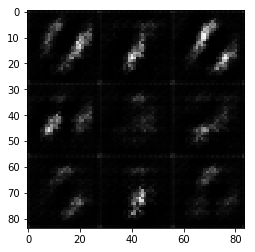

Epoch 1/2... Discriminator Loss: 1.0412... Generator Loss: 0.8023


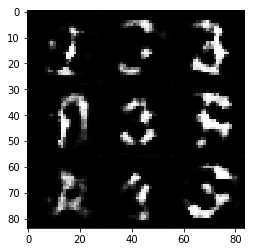

Epoch 1/2... Discriminator Loss: 1.3147... Generator Loss: 1.3801


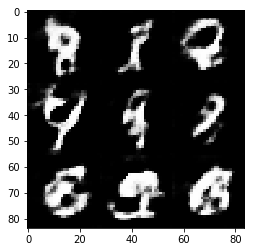

Epoch 1/2... Discriminator Loss: 1.1510... Generator Loss: 0.7594


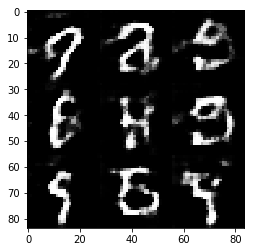

Epoch 1/2... Discriminator Loss: 0.9778... Generator Loss: 1.5960


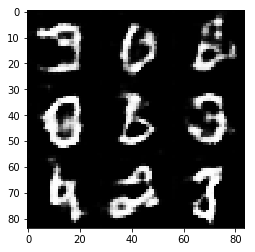

Epoch 1/2... Discriminator Loss: 0.8546... Generator Loss: 1.2576


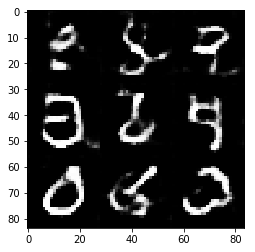

Epoch 2/2... Discriminator Loss: 1.1342... Generator Loss: 0.7598


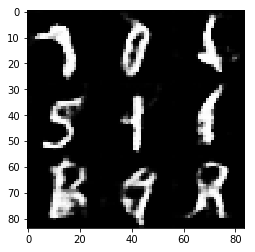

Epoch 2/2... Discriminator Loss: 1.1071... Generator Loss: 0.7816


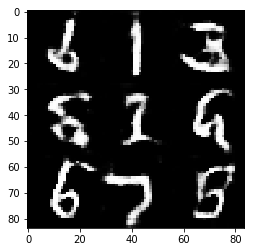

Epoch 2/2... Discriminator Loss: 1.1040... Generator Loss: 1.4039


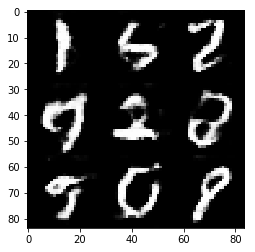

Epoch 2/2... Discriminator Loss: 1.0539... Generator Loss: 0.6816


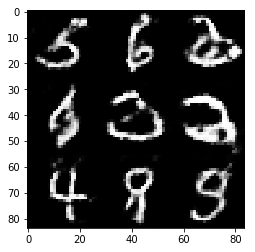

Epoch 2/2... Discriminator Loss: 1.1185... Generator Loss: 0.5677


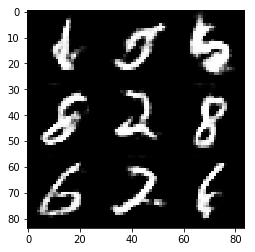

Epoch 2/2... Discriminator Loss: 0.8943... Generator Loss: 0.7492


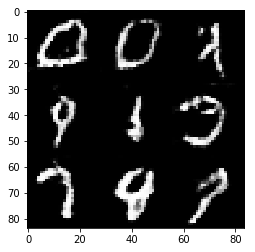

In [112]:
batch_size = 100
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/10... Discriminator Loss: 1.7142... Generator Loss: 0.5721


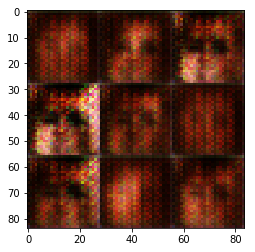

Epoch 1/10... Discriminator Loss: 0.9227... Generator Loss: 0.7649


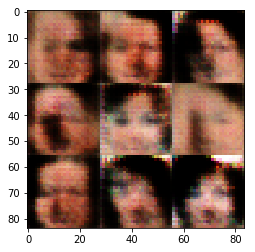

Epoch 1/10... Discriminator Loss: 1.1988... Generator Loss: 2.3624


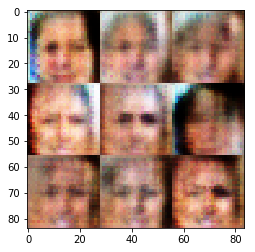

Epoch 1/10... Discriminator Loss: 0.9642... Generator Loss: 2.0200


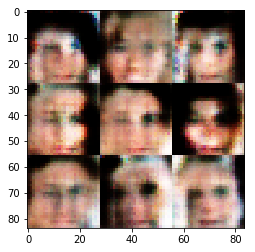

Epoch 1/10... Discriminator Loss: 1.9870... Generator Loss: 3.3118


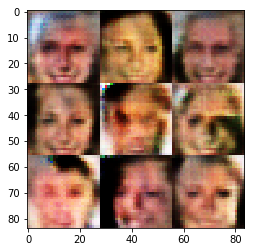

Epoch 1/10... Discriminator Loss: 0.7339... Generator Loss: 1.9034


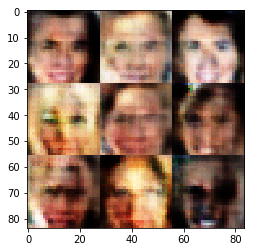

Epoch 1/10... Discriminator Loss: 0.7283... Generator Loss: 1.0446


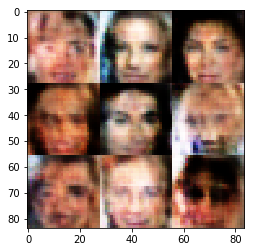

Epoch 1/10... Discriminator Loss: 2.0608... Generator Loss: 2.2550


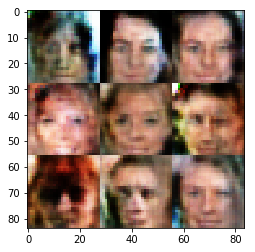

Epoch 1/10... Discriminator Loss: 0.6534... Generator Loss: 1.1339


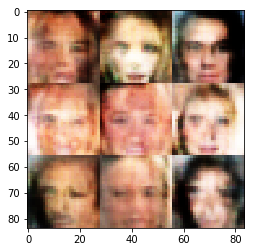

Epoch 1/10... Discriminator Loss: 0.1484... Generator Loss: 3.3047


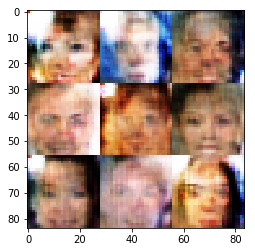

Epoch 1/10... Discriminator Loss: 0.8053... Generator Loss: 3.3220


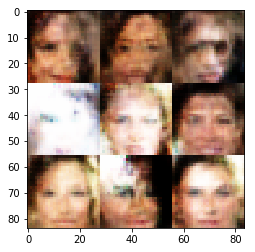

Epoch 1/10... Discriminator Loss: 0.1836... Generator Loss: 2.9044


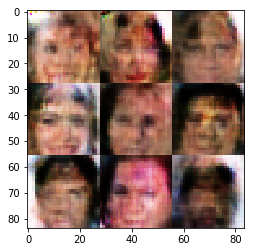

Epoch 1/10... Discriminator Loss: 0.0533... Generator Loss: 4.3422


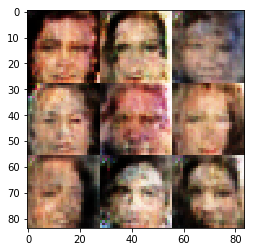

Epoch 1/10... Discriminator Loss: 1.3781... Generator Loss: 0.4218


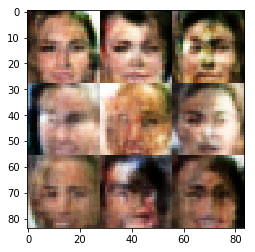

Epoch 1/10... Discriminator Loss: 1.3743... Generator Loss: 3.0836


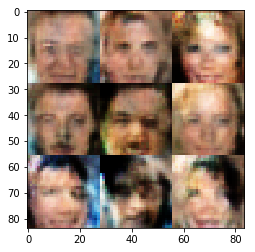

Epoch 1/10... Discriminator Loss: 0.2667... Generator Loss: 2.0518


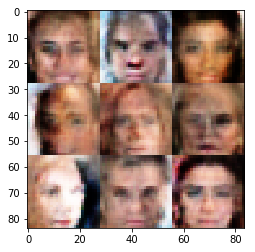

Epoch 1/10... Discriminator Loss: 0.6873... Generator Loss: 1.2841


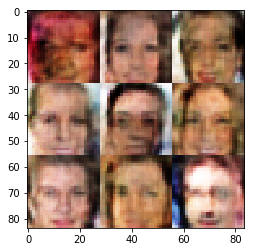

Epoch 1/10... Discriminator Loss: 0.9700... Generator Loss: 2.9741


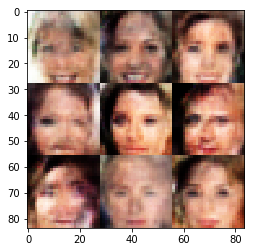

Epoch 1/10... Discriminator Loss: 0.5856... Generator Loss: 3.1293


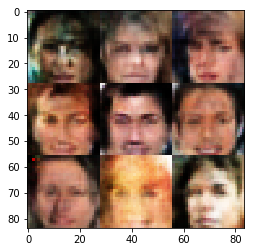

Epoch 1/10... Discriminator Loss: 1.5470... Generator Loss: 3.6406


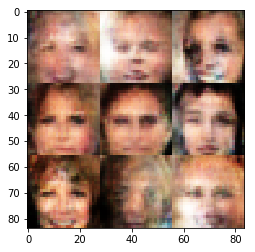

Epoch 2/10... Discriminator Loss: 0.4262... Generator Loss: 2.1720


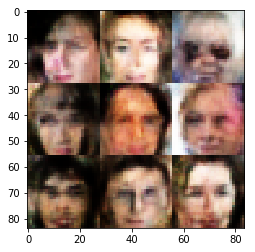

Epoch 2/10... Discriminator Loss: 0.8371... Generator Loss: 1.5605


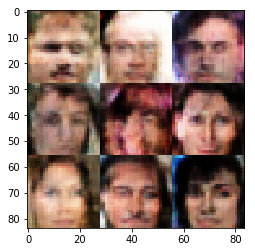

Epoch 2/10... Discriminator Loss: 0.4714... Generator Loss: 1.5533


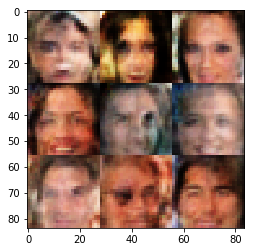

Epoch 2/10... Discriminator Loss: 0.5149... Generator Loss: 2.0804


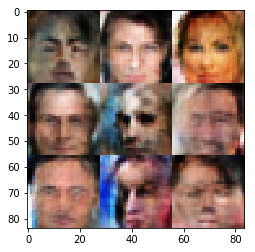

Epoch 2/10... Discriminator Loss: 0.5201... Generator Loss: 1.4441


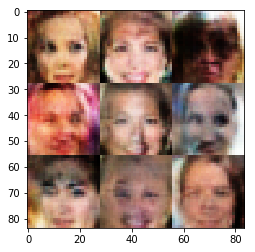

Epoch 2/10... Discriminator Loss: 0.3540... Generator Loss: 1.7348


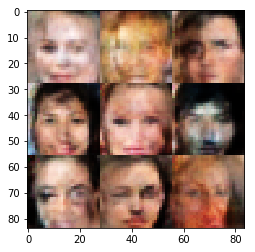

Epoch 2/10... Discriminator Loss: 0.2418... Generator Loss: 2.7254


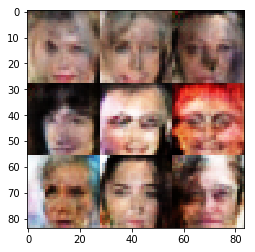

Epoch 2/10... Discriminator Loss: 0.6209... Generator Loss: 1.1606


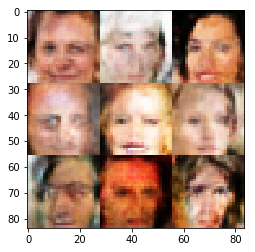

Epoch 2/10... Discriminator Loss: 1.3497... Generator Loss: 3.3037


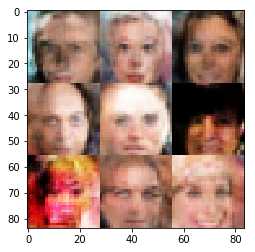

Epoch 2/10... Discriminator Loss: 0.1044... Generator Loss: 4.1591


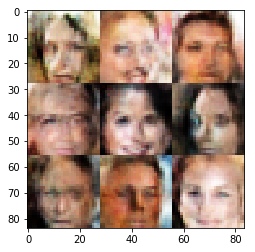

Epoch 2/10... Discriminator Loss: 1.2382... Generator Loss: 0.5093


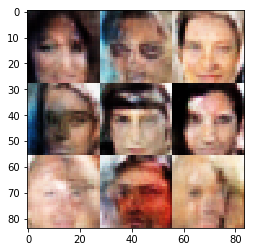

Epoch 2/10... Discriminator Loss: 0.0682... Generator Loss: 4.6022


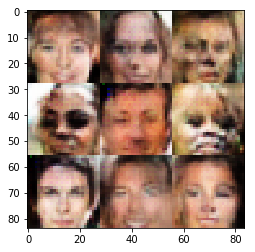

Epoch 2/10... Discriminator Loss: 1.6259... Generator Loss: 3.3398


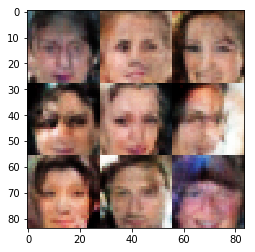

Epoch 2/10... Discriminator Loss: 0.6963... Generator Loss: 1.1432


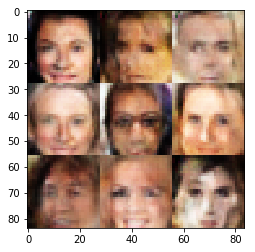

Epoch 2/10... Discriminator Loss: 0.7520... Generator Loss: 3.9834


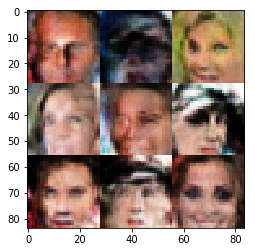

Epoch 2/10... Discriminator Loss: 0.7038... Generator Loss: 0.9821


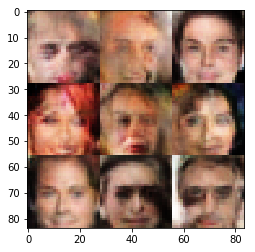

Epoch 2/10... Discriminator Loss: 0.8076... Generator Loss: 0.8376


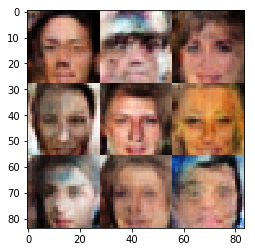

Epoch 2/10... Discriminator Loss: 0.2901... Generator Loss: 2.6789


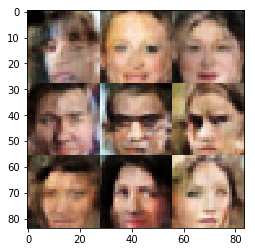

Epoch 2/10... Discriminator Loss: 1.4895... Generator Loss: 0.3990


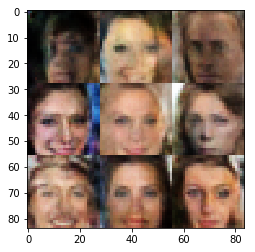

Epoch 2/10... Discriminator Loss: 0.7590... Generator Loss: 1.1556


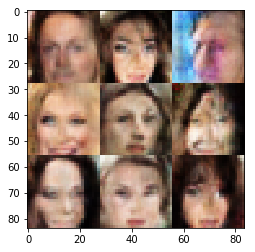

Epoch 3/10... Discriminator Loss: 0.3352... Generator Loss: 2.2409


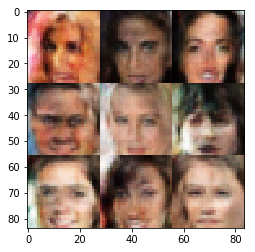

Epoch 3/10... Discriminator Loss: 0.6269... Generator Loss: 1.9677


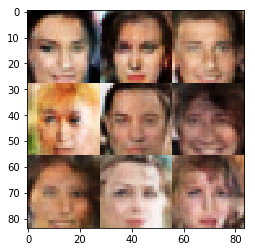

Epoch 3/10... Discriminator Loss: 0.1084... Generator Loss: 2.9844


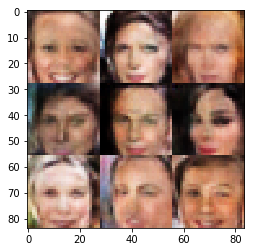

Epoch 3/10... Discriminator Loss: 0.7760... Generator Loss: 1.0521


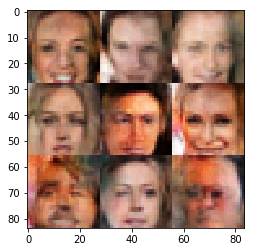

Epoch 3/10... Discriminator Loss: 0.6166... Generator Loss: 1.7668


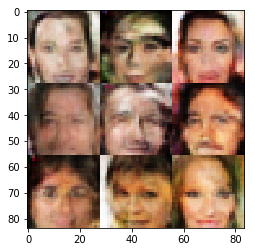

Epoch 3/10... Discriminator Loss: 1.0882... Generator Loss: 4.2479


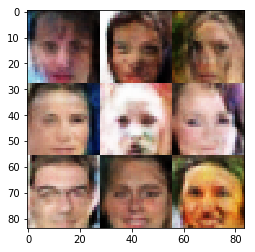

Epoch 3/10... Discriminator Loss: 0.5627... Generator Loss: 1.2712


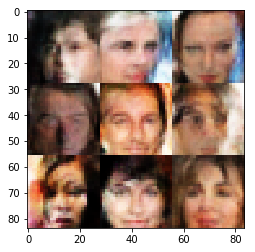

Epoch 3/10... Discriminator Loss: 0.0732... Generator Loss: 3.8711


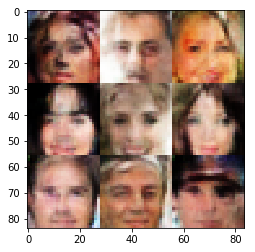

Epoch 3/10... Discriminator Loss: 0.6700... Generator Loss: 1.1948


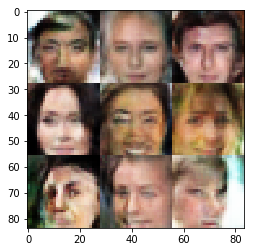

Epoch 3/10... Discriminator Loss: 1.0524... Generator Loss: 2.5815


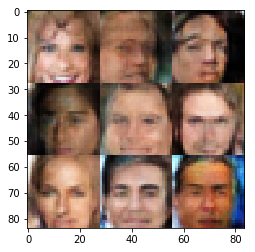

Epoch 3/10... Discriminator Loss: 0.0709... Generator Loss: 4.5807


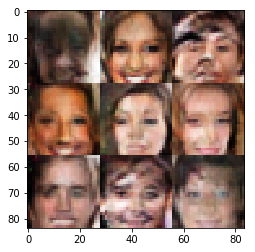

Epoch 3/10... Discriminator Loss: 0.2579... Generator Loss: 5.3189


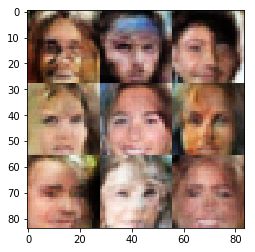

Epoch 3/10... Discriminator Loss: 0.4456... Generator Loss: 3.3266


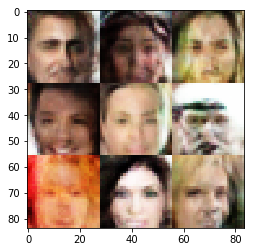

Epoch 3/10... Discriminator Loss: 0.3953... Generator Loss: 1.6234


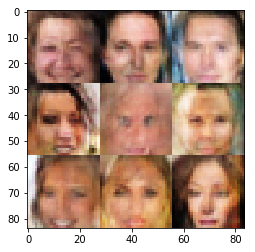

Epoch 3/10... Discriminator Loss: 0.3787... Generator Loss: 4.7898


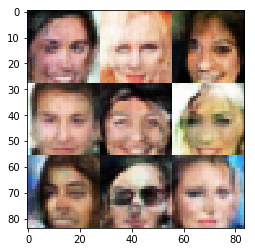

Epoch 3/10... Discriminator Loss: 0.5542... Generator Loss: 1.8390


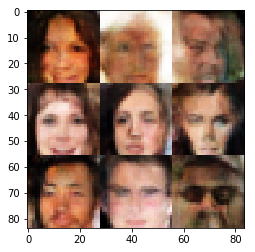

Epoch 3/10... Discriminator Loss: 1.2905... Generator Loss: 3.4897


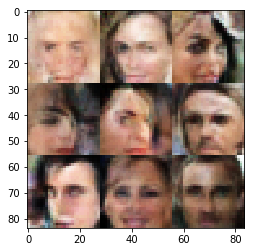

Epoch 3/10... Discriminator Loss: 1.4205... Generator Loss: 0.4171


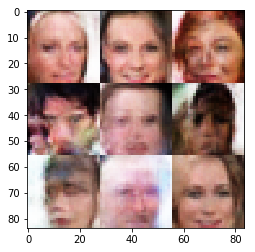

Epoch 3/10... Discriminator Loss: 0.7930... Generator Loss: 0.8153


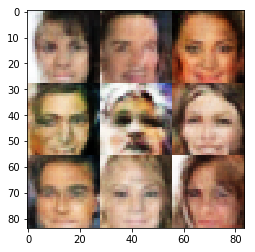

Epoch 3/10... Discriminator Loss: 0.4281... Generator Loss: 1.4338


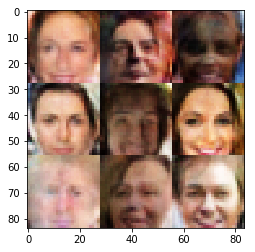

Epoch 4/10... Discriminator Loss: 0.7106... Generator Loss: 1.4241


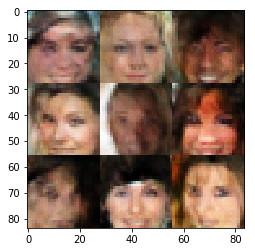

Epoch 4/10... Discriminator Loss: 0.3215... Generator Loss: 1.8992


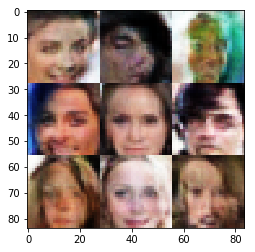

Epoch 4/10... Discriminator Loss: 0.0935... Generator Loss: 4.2232


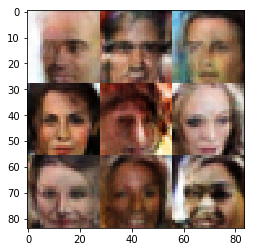

Epoch 4/10... Discriminator Loss: 0.0592... Generator Loss: 4.9833


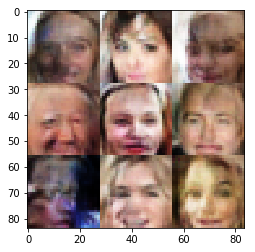

Epoch 4/10... Discriminator Loss: 0.0554... Generator Loss: 4.5622


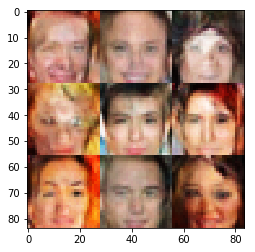

Epoch 4/10... Discriminator Loss: 0.3155... Generator Loss: 2.1648


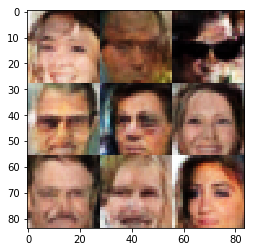

Epoch 4/10... Discriminator Loss: 0.1175... Generator Loss: 3.1400


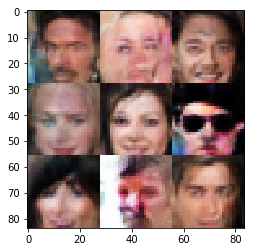

Epoch 4/10... Discriminator Loss: 0.1249... Generator Loss: 3.7967


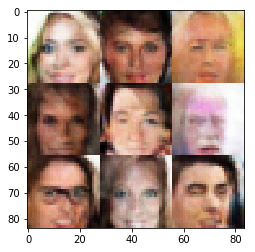

Epoch 4/10... Discriminator Loss: 0.2526... Generator Loss: 3.6318


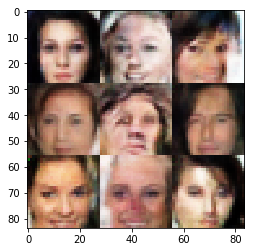

Epoch 4/10... Discriminator Loss: 2.3200... Generator Loss: 0.1820


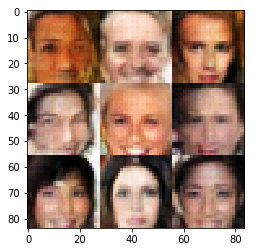

Epoch 4/10... Discriminator Loss: 0.0943... Generator Loss: 3.6629


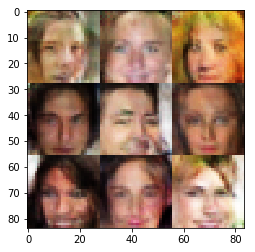

Epoch 4/10... Discriminator Loss: 0.4280... Generator Loss: 2.0173


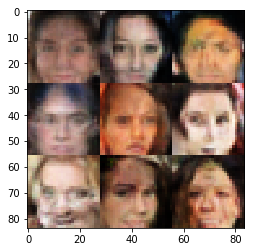

Epoch 4/10... Discriminator Loss: 0.7026... Generator Loss: 1.0799


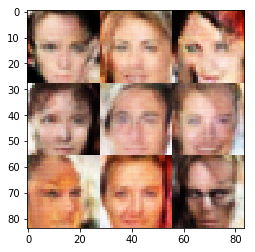

Epoch 4/10... Discriminator Loss: 1.0507... Generator Loss: 3.1011


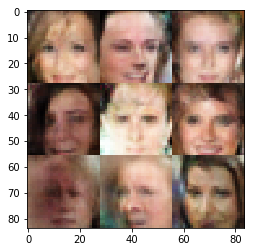

Epoch 4/10... Discriminator Loss: 0.4961... Generator Loss: 1.5638


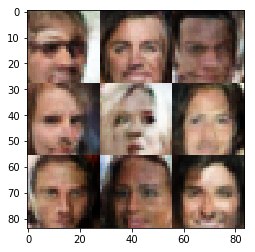

Epoch 4/10... Discriminator Loss: 0.4608... Generator Loss: 2.4184


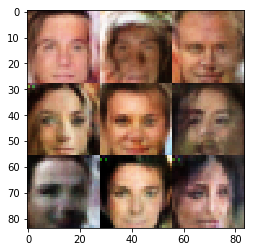

Epoch 4/10... Discriminator Loss: 0.5803... Generator Loss: 1.6751


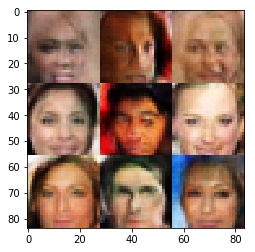

Epoch 4/10... Discriminator Loss: 0.2144... Generator Loss: 4.5233


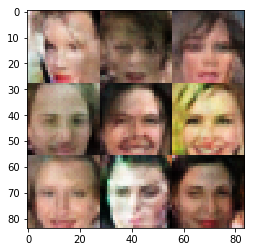

Epoch 4/10... Discriminator Loss: 0.8532... Generator Loss: 0.8596


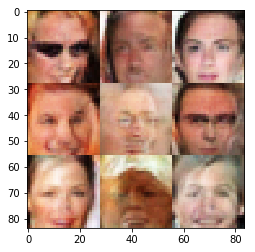

Epoch 4/10... Discriminator Loss: 0.5448... Generator Loss: 1.4369


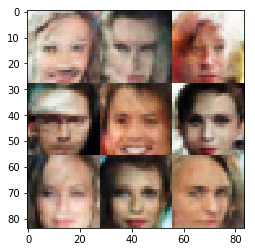

Epoch 4/10... Discriminator Loss: 0.1398... Generator Loss: 3.3127


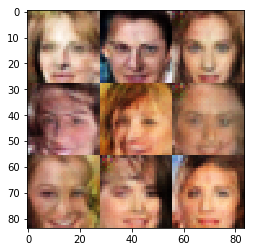

Epoch 5/10... Discriminator Loss: 0.9667... Generator Loss: 2.9258


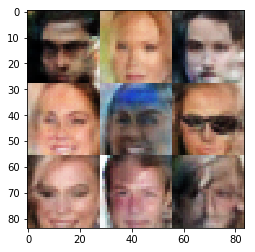

Epoch 5/10... Discriminator Loss: 0.7092... Generator Loss: 1.6007


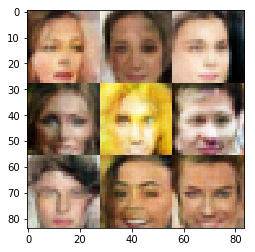

Epoch 5/10... Discriminator Loss: 0.7525... Generator Loss: 3.7700


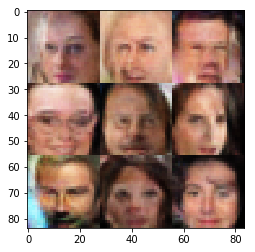

Epoch 5/10... Discriminator Loss: 0.0378... Generator Loss: 5.2282


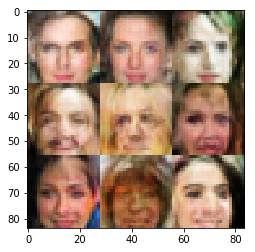

Epoch 5/10... Discriminator Loss: 0.0445... Generator Loss: 5.7224


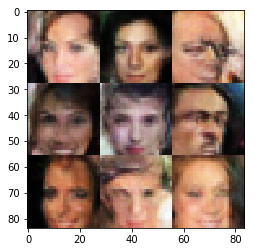

Epoch 5/10... Discriminator Loss: 0.4517... Generator Loss: 2.3755


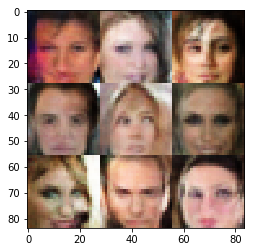

Epoch 5/10... Discriminator Loss: 0.0719... Generator Loss: 4.2612


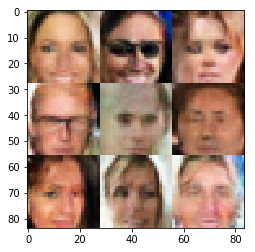

Epoch 5/10... Discriminator Loss: 1.1106... Generator Loss: 0.6564


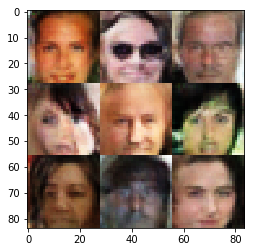

Epoch 5/10... Discriminator Loss: 0.0945... Generator Loss: 4.4709


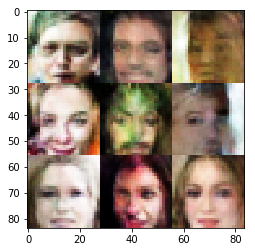

Epoch 5/10... Discriminator Loss: 0.1968... Generator Loss: 2.5483


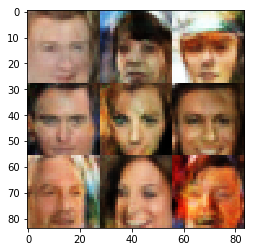

Epoch 5/10... Discriminator Loss: 0.4245... Generator Loss: 2.0018


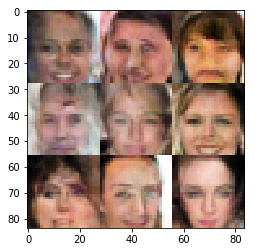

Epoch 5/10... Discriminator Loss: 0.2563... Generator Loss: 2.1961


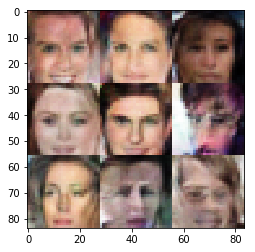

Epoch 5/10... Discriminator Loss: 0.0826... Generator Loss: 4.6677


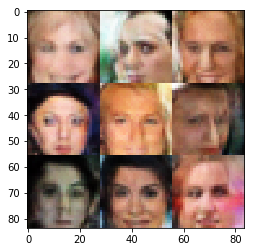

Epoch 5/10... Discriminator Loss: 1.1088... Generator Loss: 4.8558


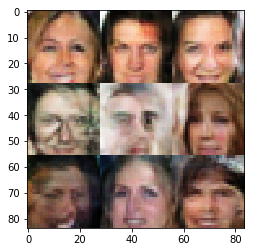

Epoch 5/10... Discriminator Loss: 0.6214... Generator Loss: 1.3232


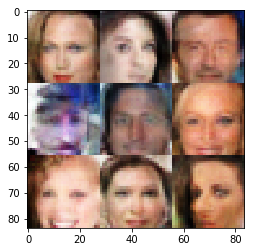

Epoch 5/10... Discriminator Loss: 0.2835... Generator Loss: 2.0270


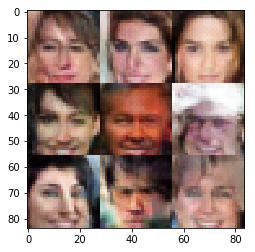

Epoch 5/10... Discriminator Loss: 1.6500... Generator Loss: 0.3891


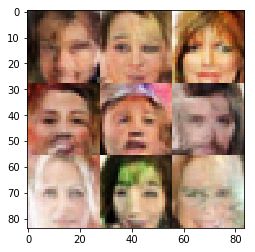

Epoch 5/10... Discriminator Loss: 0.1316... Generator Loss: 5.2537


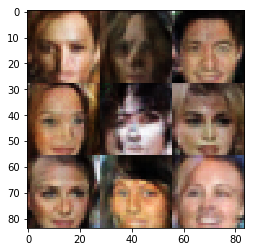

Epoch 5/10... Discriminator Loss: 0.0836... Generator Loss: 4.4515


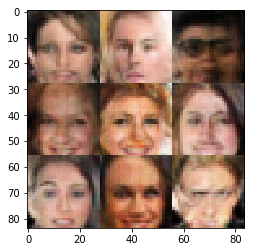

Epoch 5/10... Discriminator Loss: 0.0779... Generator Loss: 3.5474


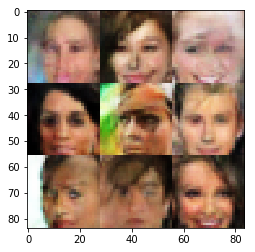

Epoch 6/10... Discriminator Loss: 0.1070... Generator Loss: 4.3739


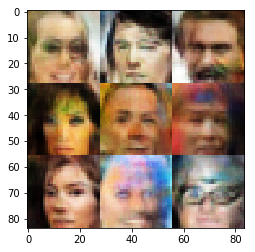

Epoch 6/10... Discriminator Loss: 0.1651... Generator Loss: 3.2568


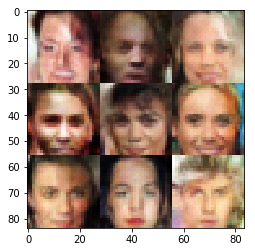

Epoch 6/10... Discriminator Loss: 0.0625... Generator Loss: 4.1242


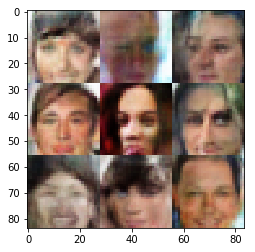

Epoch 6/10... Discriminator Loss: 0.4463... Generator Loss: 1.7744


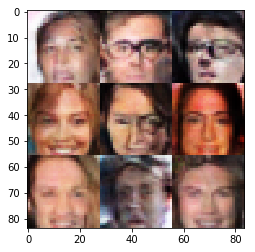

Epoch 6/10... Discriminator Loss: 0.4451... Generator Loss: 1.8772


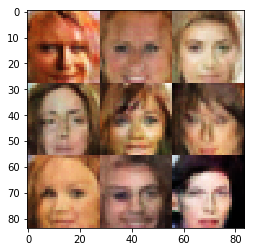

Epoch 6/10... Discriminator Loss: 0.0852... Generator Loss: 4.5492


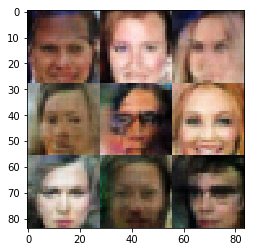

Epoch 6/10... Discriminator Loss: 0.8134... Generator Loss: 3.4116


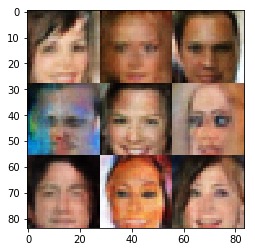

Epoch 6/10... Discriminator Loss: 0.3349... Generator Loss: 1.9166


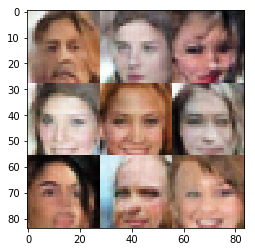

Epoch 6/10... Discriminator Loss: 0.1237... Generator Loss: 3.9668


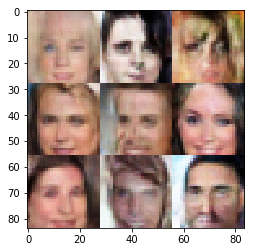

Epoch 6/10... Discriminator Loss: 1.1348... Generator Loss: 0.6302


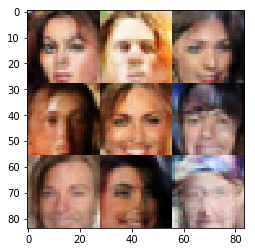

Epoch 6/10... Discriminator Loss: 0.5504... Generator Loss: 1.4050


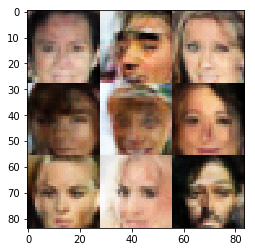

Epoch 6/10... Discriminator Loss: 0.1110... Generator Loss: 3.0468


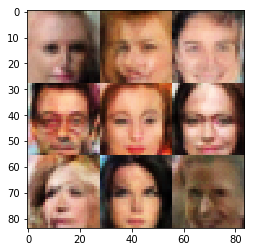

Epoch 6/10... Discriminator Loss: 0.0269... Generator Loss: 5.0498


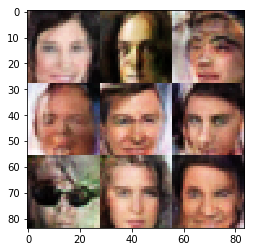

Epoch 6/10... Discriminator Loss: 0.5112... Generator Loss: 2.6166


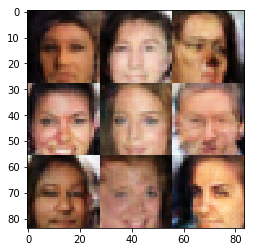

Epoch 6/10... Discriminator Loss: 2.1072... Generator Loss: 0.2481


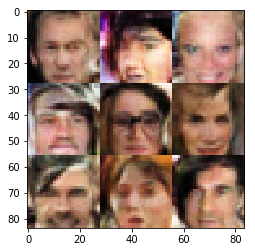

Epoch 6/10... Discriminator Loss: 1.2398... Generator Loss: 0.7723


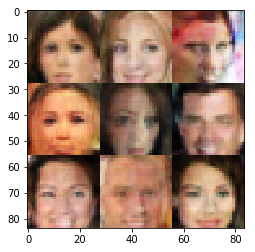

Epoch 6/10... Discriminator Loss: 0.2030... Generator Loss: 2.6872


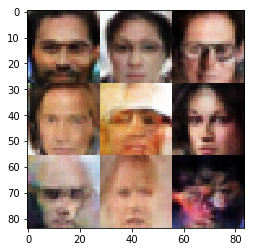

Epoch 6/10... Discriminator Loss: 0.8308... Generator Loss: 3.8132


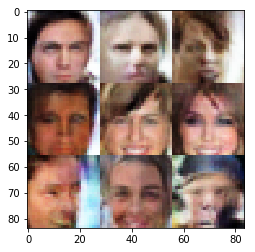

Epoch 6/10... Discriminator Loss: 1.4148... Generator Loss: 4.6239


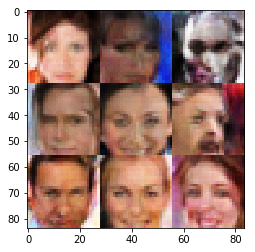

Epoch 6/10... Discriminator Loss: 0.2987... Generator Loss: 2.5179


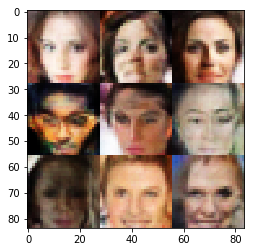

Epoch 7/10... Discriminator Loss: 1.6896... Generator Loss: 0.4625


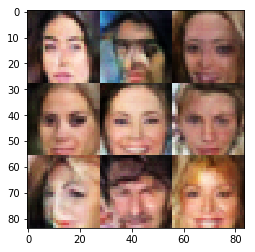

Epoch 7/10... Discriminator Loss: 1.7500... Generator Loss: 6.9720


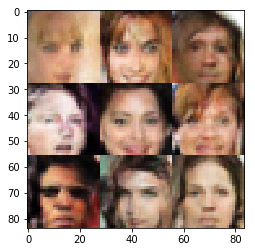

Epoch 7/10... Discriminator Loss: 1.0533... Generator Loss: 0.7070


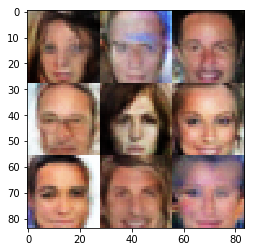

Epoch 7/10... Discriminator Loss: 0.0563... Generator Loss: 5.4308


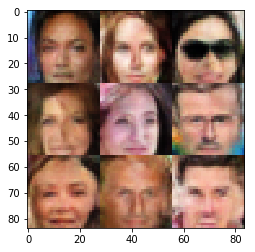

Epoch 7/10... Discriminator Loss: 0.7861... Generator Loss: 1.0573


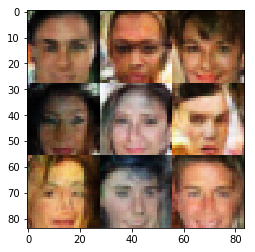

Epoch 7/10... Discriminator Loss: 0.1108... Generator Loss: 3.8607


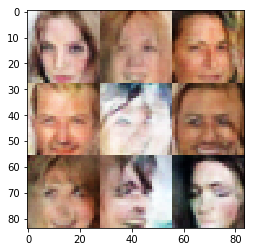

Epoch 7/10... Discriminator Loss: 0.4970... Generator Loss: 1.6432


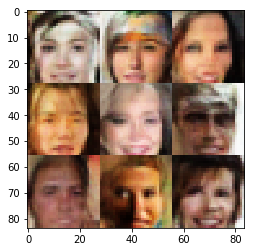

Epoch 7/10... Discriminator Loss: 0.0945... Generator Loss: 4.1578


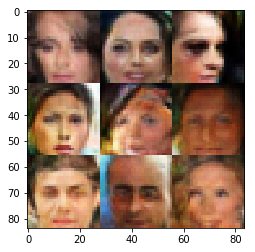

Epoch 7/10... Discriminator Loss: 0.0208... Generator Loss: 5.9629


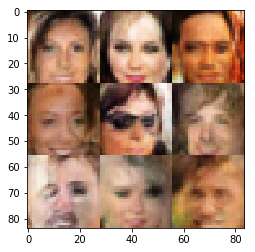

Epoch 7/10... Discriminator Loss: 1.9065... Generator Loss: 0.3581


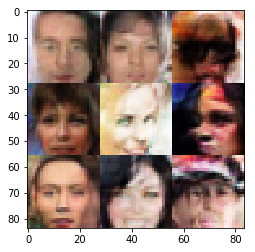

Epoch 7/10... Discriminator Loss: 0.4527... Generator Loss: 1.9486


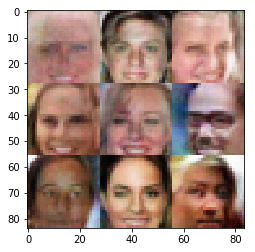

Epoch 7/10... Discriminator Loss: 0.1400... Generator Loss: 3.9173


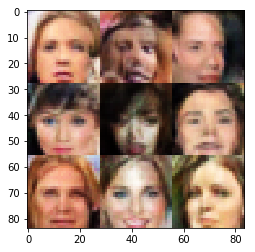

Epoch 7/10... Discriminator Loss: 0.0778... Generator Loss: 4.2127


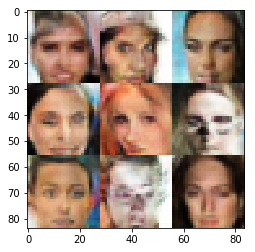

Epoch 7/10... Discriminator Loss: 0.3240... Generator Loss: 1.6397


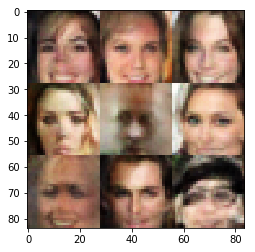

Epoch 7/10... Discriminator Loss: 0.2978... Generator Loss: 2.0124


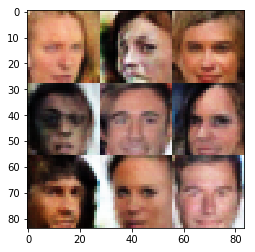

Epoch 7/10... Discriminator Loss: 0.1202... Generator Loss: 3.0712


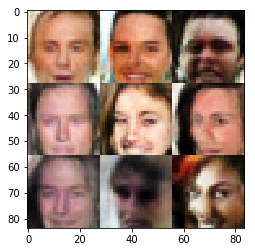

Epoch 7/10... Discriminator Loss: 0.0521... Generator Loss: 4.3716


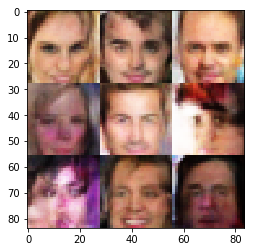

Epoch 7/10... Discriminator Loss: 0.4410... Generator Loss: 1.6421


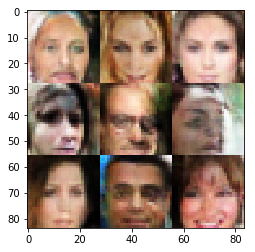

Epoch 7/10... Discriminator Loss: 0.4971... Generator Loss: 1.8716


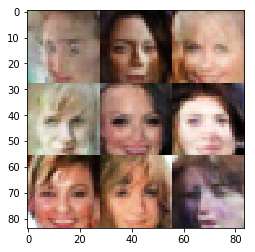

Epoch 7/10... Discriminator Loss: 0.0221... Generator Loss: 6.5581


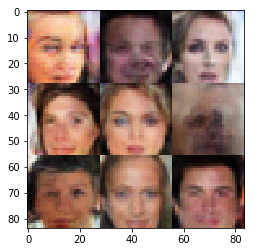

Epoch 8/10... Discriminator Loss: 0.1352... Generator Loss: 2.9545


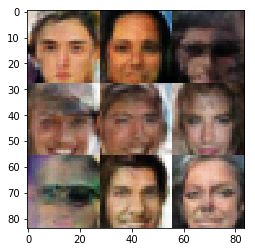

Epoch 8/10... Discriminator Loss: 0.3450... Generator Loss: 1.6998


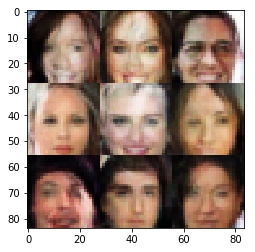

Epoch 8/10... Discriminator Loss: 2.1461... Generator Loss: 0.2545


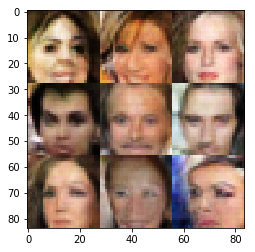

Epoch 8/10... Discriminator Loss: 0.0386... Generator Loss: 4.6862


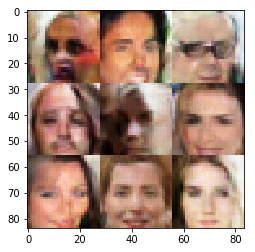

Epoch 8/10... Discriminator Loss: 0.3882... Generator Loss: 3.0497


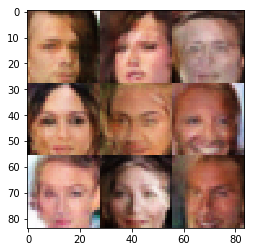

Epoch 8/10... Discriminator Loss: 0.1229... Generator Loss: 3.0019


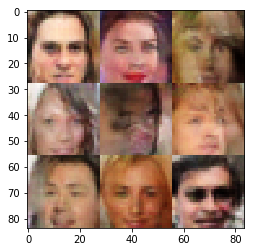

Epoch 8/10... Discriminator Loss: 0.1441... Generator Loss: 2.8786


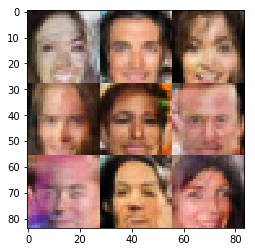

Epoch 8/10... Discriminator Loss: 0.3707... Generator Loss: 2.0157


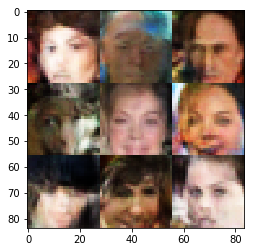

Epoch 8/10... Discriminator Loss: 0.0948... Generator Loss: 3.3716


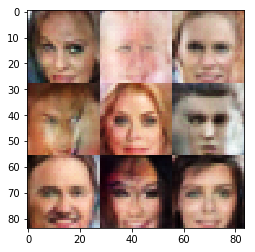

Epoch 8/10... Discriminator Loss: 0.1399... Generator Loss: 4.0671


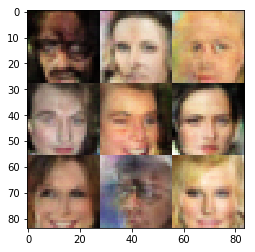

Epoch 8/10... Discriminator Loss: 0.0702... Generator Loss: 3.9813


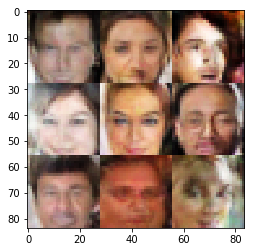

Epoch 8/10... Discriminator Loss: 0.1778... Generator Loss: 3.2770


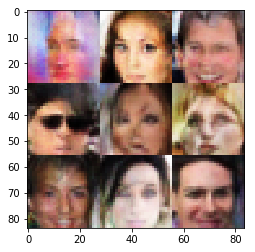

Epoch 8/10... Discriminator Loss: 2.4591... Generator Loss: 0.2160


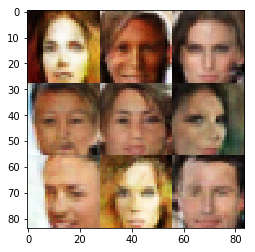

Epoch 8/10... Discriminator Loss: 0.2738... Generator Loss: 3.0655


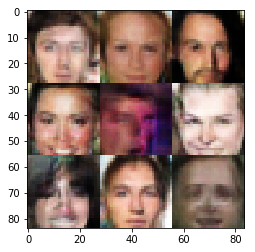

Epoch 8/10... Discriminator Loss: 0.3374... Generator Loss: 2.1758


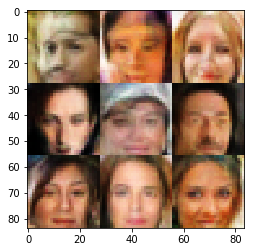

Epoch 8/10... Discriminator Loss: 0.3550... Generator Loss: 1.9435


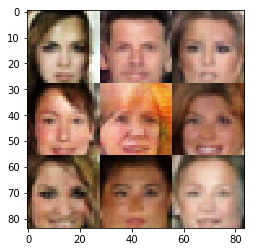

Epoch 8/10... Discriminator Loss: 0.2746... Generator Loss: 2.8813


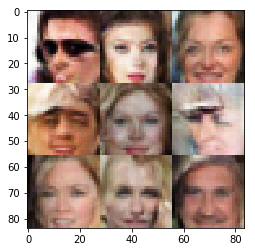

Epoch 8/10... Discriminator Loss: 1.5047... Generator Loss: 4.9414


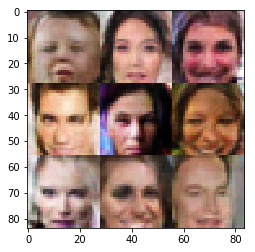

Epoch 8/10... Discriminator Loss: 0.0445... Generator Loss: 5.5654


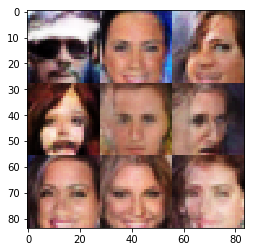

Epoch 8/10... Discriminator Loss: 0.5102... Generator Loss: 1.5873


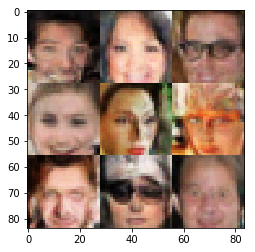

Epoch 8/10... Discriminator Loss: 0.1305... Generator Loss: 2.7960


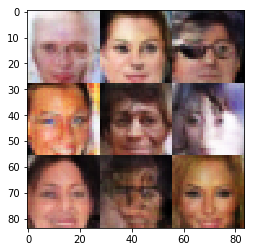

Epoch 9/10... Discriminator Loss: 0.3079... Generator Loss: 3.4915


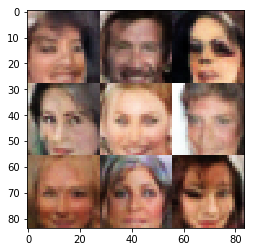

Epoch 9/10... Discriminator Loss: 0.4591... Generator Loss: 1.6865


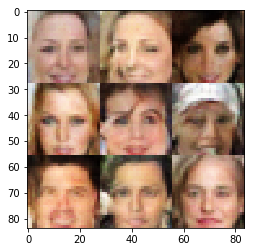

Epoch 9/10... Discriminator Loss: 0.3872... Generator Loss: 1.9914


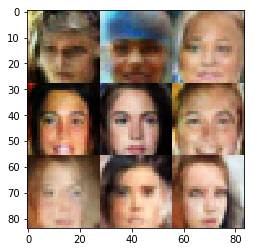

Epoch 9/10... Discriminator Loss: 0.5605... Generator Loss: 1.5242


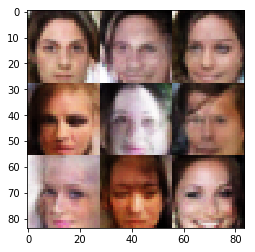

Epoch 9/10... Discriminator Loss: 0.0341... Generator Loss: 5.8719


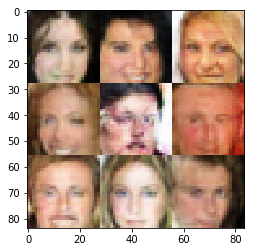

Epoch 9/10... Discriminator Loss: 0.0943... Generator Loss: 3.4050


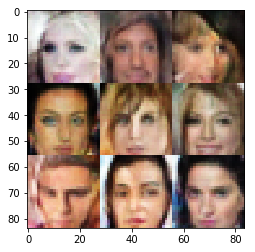

Epoch 9/10... Discriminator Loss: 0.0273... Generator Loss: 7.3378


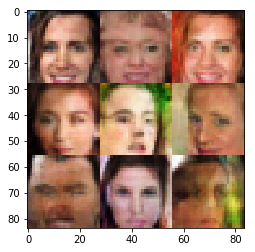

Epoch 9/10... Discriminator Loss: 0.4951... Generator Loss: 4.0819


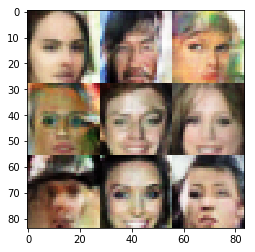

Epoch 9/10... Discriminator Loss: 0.0895... Generator Loss: 3.3954


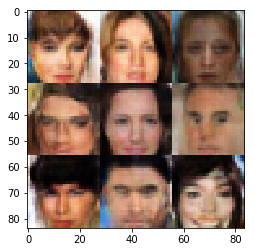

Epoch 9/10... Discriminator Loss: 0.0595... Generator Loss: 4.4534


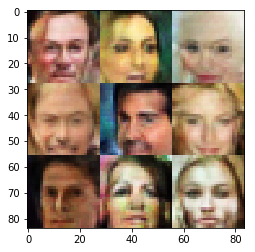

Epoch 9/10... Discriminator Loss: 1.7456... Generator Loss: 0.7571


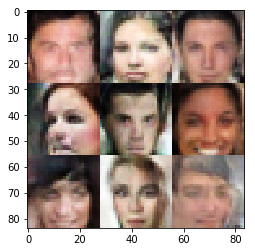

Epoch 9/10... Discriminator Loss: 0.8246... Generator Loss: 1.1612


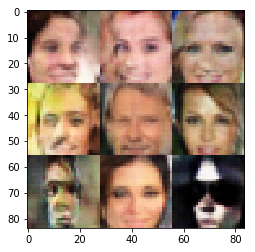

Epoch 9/10... Discriminator Loss: 0.0297... Generator Loss: 5.9786


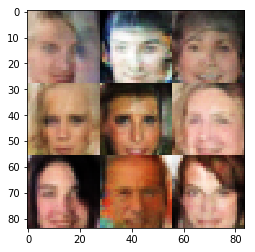

Epoch 9/10... Discriminator Loss: 0.4037... Generator Loss: 1.6979


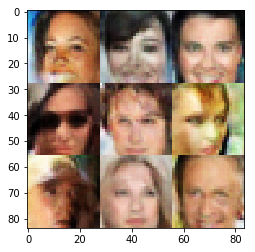

Epoch 9/10... Discriminator Loss: 1.1056... Generator Loss: 0.9996


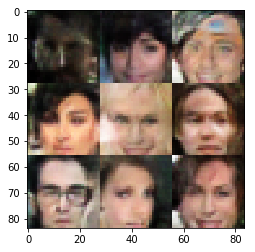

Epoch 9/10... Discriminator Loss: 0.5760... Generator Loss: 4.6419


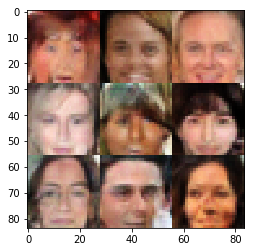

Epoch 9/10... Discriminator Loss: 0.7080... Generator Loss: 1.1935


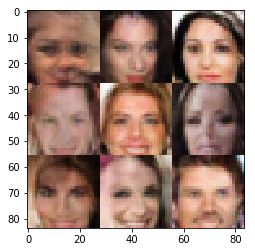

Epoch 9/10... Discriminator Loss: 0.0299... Generator Loss: 4.7387


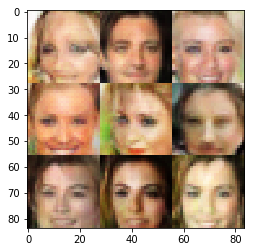

Epoch 9/10... Discriminator Loss: 1.4115... Generator Loss: 0.5762


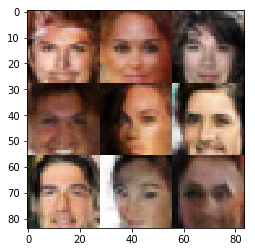

Epoch 9/10... Discriminator Loss: 0.4499... Generator Loss: 1.5947


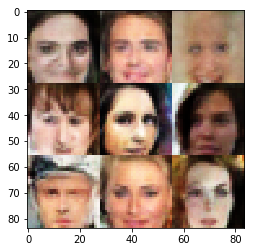

Epoch 10/10... Discriminator Loss: 0.8120... Generator Loss: 1.0364


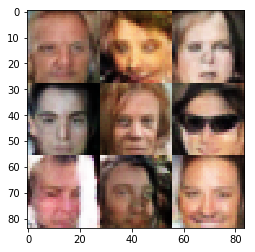

Epoch 10/10... Discriminator Loss: 0.3602... Generator Loss: 3.3608


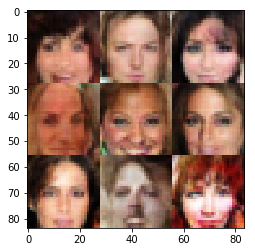

Epoch 10/10... Discriminator Loss: 0.0773... Generator Loss: 4.6563


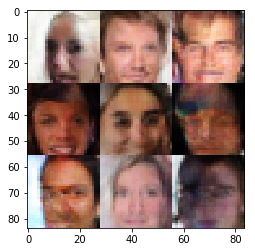

Epoch 10/10... Discriminator Loss: 0.4192... Generator Loss: 1.6855


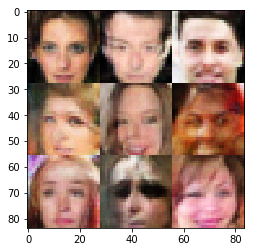

Epoch 10/10... Discriminator Loss: 0.2106... Generator Loss: 2.3591


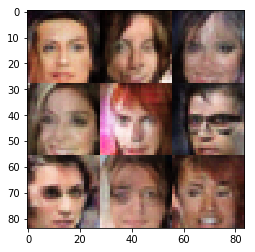

Epoch 10/10... Discriminator Loss: 2.0953... Generator Loss: 9.0402


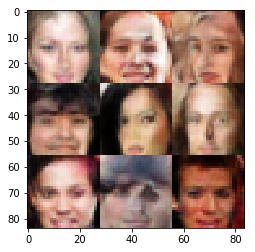

Epoch 10/10... Discriminator Loss: 0.5834... Generator Loss: 1.6277


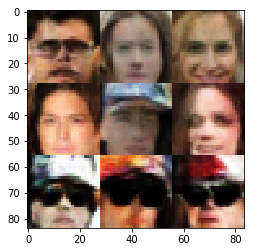

Epoch 10/10... Discriminator Loss: 0.3767... Generator Loss: 1.7983


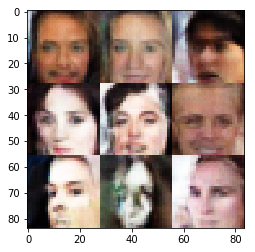

Epoch 10/10... Discriminator Loss: 0.2752... Generator Loss: 2.2292


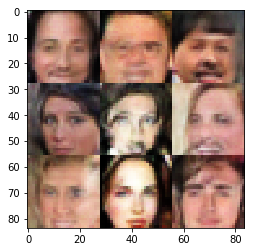

Epoch 10/10... Discriminator Loss: 0.3933... Generator Loss: 1.8630


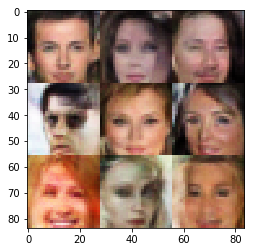

Epoch 10/10... Discriminator Loss: 0.0089... Generator Loss: 8.0213


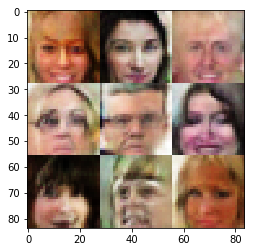

Epoch 10/10... Discriminator Loss: 1.2022... Generator Loss: 5.0197


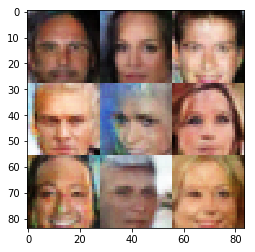

Epoch 10/10... Discriminator Loss: 0.3556... Generator Loss: 2.4465


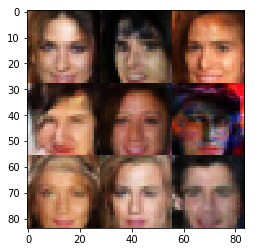

Epoch 10/10... Discriminator Loss: 0.3534... Generator Loss: 2.5067


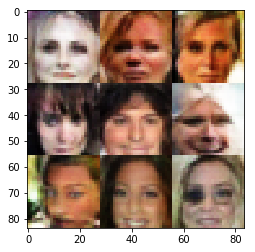

Epoch 10/10... Discriminator Loss: 0.0836... Generator Loss: 3.2834


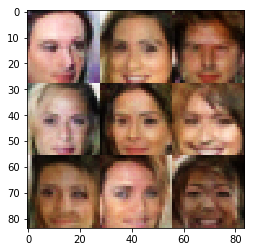

Epoch 10/10... Discriminator Loss: 0.0512... Generator Loss: 4.2791


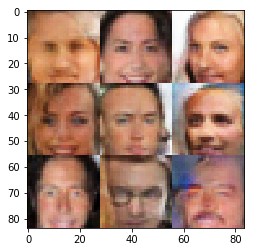

Epoch 10/10... Discriminator Loss: 0.7180... Generator Loss: 1.1386


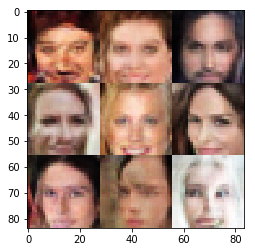

Epoch 10/10... Discriminator Loss: 0.4614... Generator Loss: 1.6791


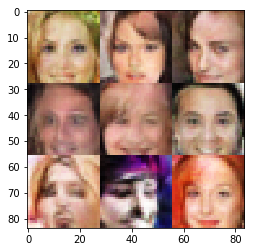

Epoch 10/10... Discriminator Loss: 0.1490... Generator Loss: 3.3684


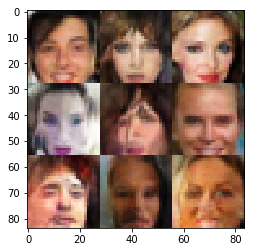

Epoch 10/10... Discriminator Loss: 0.9204... Generator Loss: 1.0547


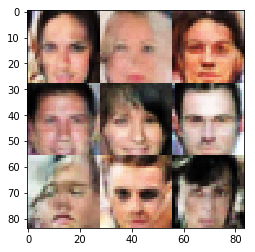

In [113]:
batch_size = 100
z_dim = 100
learning_rate = 0.001
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 10

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.